In [233]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from  sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from scipy.stats import norm
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,make_scorer
from sklearn.model_selection import cross_val_score


In [234]:
music_df=pd.read_csv("song_data.csv")
music_df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


Checking the missing values of the datasets

In [235]:
music_df.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

No missing values so we can go with Data Normalization

C:\Users\Mageshwaran07\AppData\Local\Temp\ipykernel_16216\1715433347.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(music_df['song_popularity'], fit=norm, kde=True, hist_kws={'edgecolor':'blue'}, color='skyblue', label='Song Popularity')


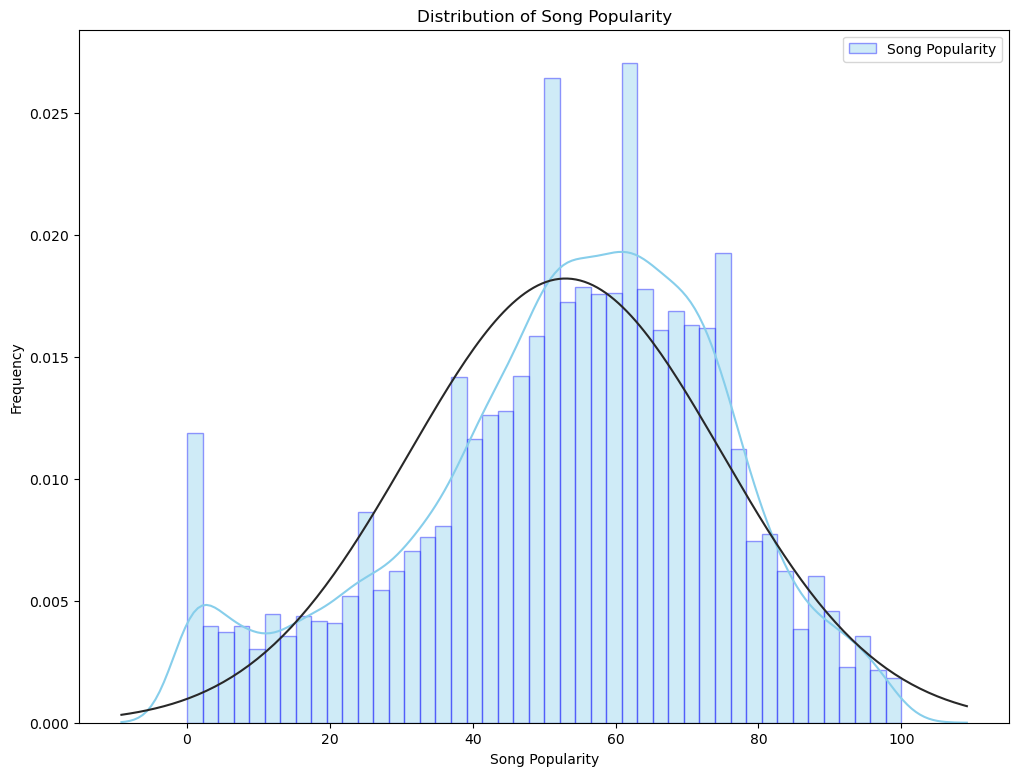

In [236]:
plt.figure(figsize=(12, 9))
sns.distplot(music_df['song_popularity'], fit=norm, kde=True, hist_kws={'edgecolor':'blue'}, color='skyblue', label='Song Popularity')
plt.title('Distribution of Song Popularity')
plt.xlabel('Song Popularity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Some machine learning algorithms perform better when features are on a similar scale. For example, distance-based algorithms like k-Nearest Neighbors (k-NN) and gradient descent-based optimization algorithms (used in many linear models and neural networks) may benefit from normalization.

Tree-based models (e.g., decision trees, random forests) and ensemble methods are generally insensitive to feature scaling. These algorithms make decisions based on feature thresholds and are not affected by the scale of individual features.

No encoding of categorical variables is needed as there is only one categorical feature, which is song name, and it doesn't affect the music popularity. However, if the feature is named as 'music_directors,' it may affect the target value (music popularity).

music_name-->Nominal Variables-->Doesn't Impact on Targeted values-->One-Hot encoding
music_directors-->Ordinal variables-->Impact on Targeted values-->Label Enoding

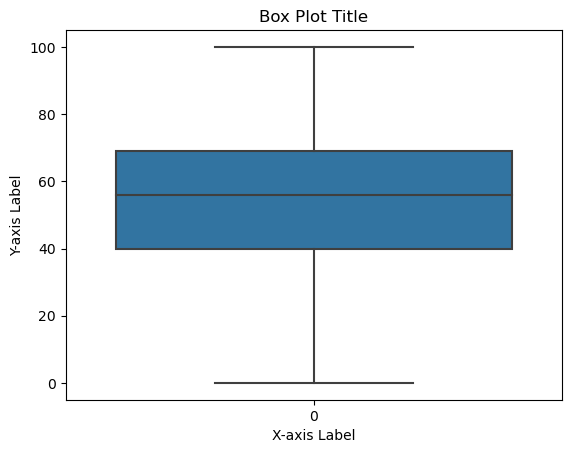

In [237]:
sns.boxplot(music_df['song_popularity'])

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Box Plot Title')

# Show the plot
plt.show()


Q1 (First Quartile): 
40.0
40.0

This is the value below which 25% of the data falls. It marks the 25th percentile of the dataset.
Q2 (Median or Second Quartile): 
56.0
56.0

This is the middle value of the dataset when it is ordered. Half of the data falls below this value, and half falls above it.
Q3 (Third Quartile): 
69.0
69.0

This is the value below which 75% of the data falls. It marks the 75th percentile of the dataset.
IQR (Interquartile Range): 
29.0
29.0

The IQR is the range between the first quartile (Q1) and the third quartile (Q3). It represents the central 50% of the data. In this case, it tells you that the middle 50% of the data has a spread of 
29.0
29.0 units.

In [238]:
data = np.array(music_df["song_popularity"])

# Calculate Q1, Q2 (median), and Q3
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)  # Same as np.median(data)
q3 = np.percentile(data, 75)

iqr = q3 - q1

print("Q1:", q1)
print("Q2 (Median):", q2)
print("Q3:", q3)
print("IQR:", iqr)

Q1: 40.0
Q2 (Median): 56.0
Q3: 69.0
IQR: 29.0


In [239]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


Statistical Analaysis

Finding the correlation between the features

In [240]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

<Axes: >

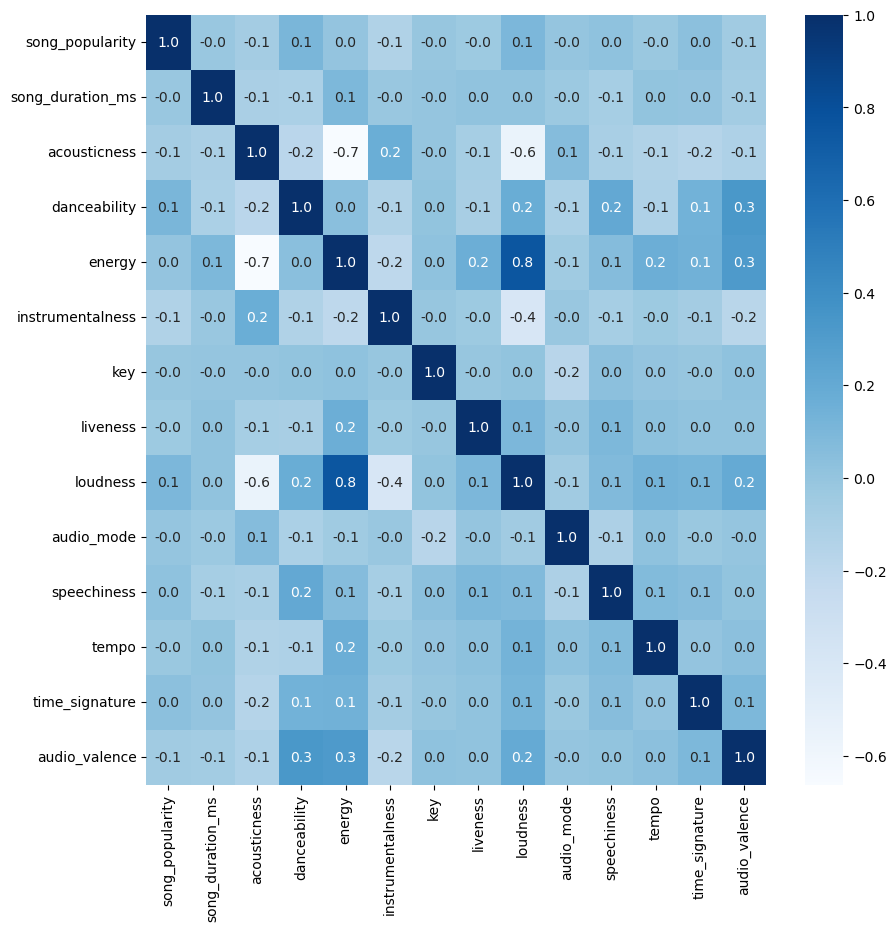

In [241]:
music_df.drop(columns=["song_name"],axis=1,inplace=True)#This will not be corelated to any features we droped this 
plt.figure(figsize=(10,10))
cor=music_df.corr()
sns.heatmap(cor,annot=True,fmt='.1f',cmap='Blues',cbar=True)

"As Energy and Loudness are highly positively correlated with each other, we can eliminate a single feature to improve computational efficiency. Instead of dropping Energy, we dropped Loudness, as Energy is negatively correlated with Acousticness."

Corelation between the Features and Target Variable

<Axes: >

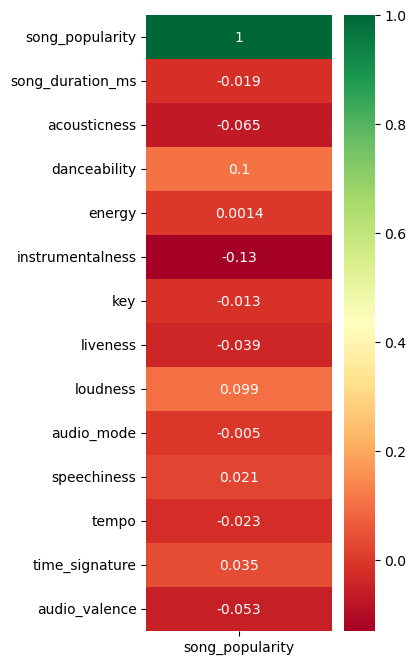

In [242]:
plt.figure(figsize=(3,8))
sns.heatmap(music_df.corr()[['song_popularity']],annot=True,cmap='RdYlGn') #correlation between the features  and  the music popularity

Spliting of Target and Feature Variables

In [243]:
x=music_df.drop(columns=["song_popularity","loudness"],axis=1)
y=music_df["song_popularity"]
x.shape

(18835, 12)

In [244]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3,train_size=0.8)
print("No.of Training Dataset = ",x_train.shape)
print("No.of training Data = ",x_train.shape)

No.of Training Dataset =  (15068, 12)
No.of training Data =  (15068, 12)


Training of Model

In [245]:
model=XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Predicting the Model

R2 Score (R-squared):

R2 score is a measure of how well the model explains the variance in the target variable.
The R-squared (R2) score is a statistical measure that represents the proportion of the variance in the dependent variable that is 
predictable from the independent variables in a regression model.

Mean Absolute Error (MAE):

MAE represents the average absolute difference between the predicted values and the actual values.

Mean Squared Error (MSE):

MSE measures the average squared difference between predicted values and actual values.


In [246]:
predicted=model.predict(x_train)
predicted

array([38.01867 , 63.679634, 39.845203, ..., 62.26837 , 49.5135  ,
       35.06728 ], dtype=float32)

In [247]:
predicted=model.predict(x_train)
# R2 Score for a better model the R2 Score should be equal to 1
score1=metrics.r2_score(y_train,predicted)
# Mean Absolute Error
score2=metrics.mean_absolute_error(y_train,predicted)

print("R2 Score : ",score1)
print("Mean Absolute Error : ",score2)

R2 Score :  0.692247618792025
Mean Absolute Error :  9.158618444851287


In [248]:
predicted=model.predict(x_test)
# R2 Score for a better model the R2 Score should be equal to 1
score1=metrics.r2_score(y_test,predicted)
# Mean Absolute Error
score2=metrics.mean_absolute_error(y_test,predicted)

print("R2 Score : ",score1)
print("Mean Absolute Error : ",score2)

R2 Score :  0.24034221894165297
Mean Absolute Error :  14.426942515525921


In [249]:
'''
Note:--
Without Dropping the loundness features the model gives the R2 Score is 15.87
Without any hyperparameter changing the the model gives the R2 Score is 15.87

'''

'\nNote:--\nWithout Dropping the loundness features the model gives the R2 Score is 15.87\nWithout any hyperparameter changing the the model gives the R2 Score is 15.87\n\n'

Hyperparameter Tunning

In [257]:
model=XGBRegressor(learning_rate=0.1,n_estimators=200,max_depth=10,random_state=42,enable_categorical=True)
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [258]:
predicted=model.predict(x_train)
# R2 Score for a better model the R2 Score should be equal to 1
score1=metrics.r2_score(y_train,predicted)
# Mean Absolute Error
score2=metrics.mean_absolute_error(y_train,predicted)
# Mean Squared Error
score3=metrics.mean_squared_error(y_train,predicted)

print("R2 Score : ",score1)
print("Mean Absolute Error : ",score2)
print("Mean Squared Error : ",score3)

R2 Score :  0.9556371539978289
Mean Absolute Error :  2.8376753940605486
Mean Squared Error :  21.35511716628275


In [259]:
predicted=model.predict(x_test)
# R2 Score for a better model the R2 Score should be equal to 1
score1=metrics.r2_score(y_test,predicted)
# Mean Absolute Error
score2=metrics.mean_absolute_error(y_test,predicted)
# Mean Squared Error
score3=metrics.mean_squared_error(y_test,predicted)

print("R2 Score : ",score1)
print("Mean Absolute Error : ",score2)
print("Mean Squared Error : ",np.sqrt(score3))

R2 Score :  0.3520262837021877
Mean Absolute Error :  12.27852397013969
Mean Squared Error :  17.518826179134315
